In [2]:
pip install polygon-api-client

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install fire

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install questionary

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install load_dotenv

Note: you may need to restart the kernel to use updated packages.


In [22]:
#from polygon import RESTClient

In [14]:
#import the necessary modules
import pandas as pd
#questionary
from pathlib import Path
import fire
import questionary
#API
import os
import json
import requests
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
%matplotlib inline


In [15]:
from IPython.display import display_html 

In [16]:
POLYGON_API_KEY = 'JQfBpF3NpcYjuBdMiXeUr6q54XafY_pQ'

In [17]:
ticker_list = ["AMZN", "RTH", "AMT", "IYR", "XOM", "XLE", "SPY"]

In [18]:
import requests
import datetime
from time import sleep
from tqdm import tqdm
def get_prices(start_date,end_date,universe):
    data = pd.DataFrame()
    # end_at = datetime.datetime.now() 
    # begin_from = end_at + datetime.timedelta(days=-5000)
    for t in tqdm(universe):
        print(t)
        print(len(data))
        # for start in pd.date_range(start = begin_from, end = end_at,normalize=True,freq = '88D'):
        #     end = start + datetime.timedelta(days = 88)
        #     end = str(int((end - datetime.datetime(1970,1,1)).total_seconds()))
        #     start = str(int((start - datetime.datetime(1970,1,1)).total_seconds()))
        try:
            r = requests.get(f'https://api.polygon.io/v2/aggs/ticker/{t}/range/1/day/{start_date}/{end_date}?apiKey={POLYGON_API_KEY}')
        except json.JSONDecodeError:
            pass
        try:
            # print(r.json())
            temp_data = pd.DataFrame(r.json()['results'])
            temp_data['ticker'] = t
            data = data.append(temp_data, ignore_index=True)
            print(t+':'+str(pd.to_datetime(start_date, unit='s'))+':'+str(pd.to_datetime(end_date, unit='s')))
        except KeyError:
            print(f'{t} was not found')
            pass
        except ValueError:
            pass
        except ConnectionError as error:
            print(error)
            sleep(200)
            continue
        except TimeoutError as error:
            print(error)
            sleep(200)
            continue
        sleep(0.25)
#     data.to_csv(file_name,index = False)
    data.t = pd.to_datetime(data.t, unit = 'ms')
    columns_name = {'t': 'time', 'o': 'Open', 'c': 'Close', 'h': 'High', 'l': 'Low', 'v': 'Volume'} 
    data= data.rename(columns = columns_name)
    data = data[['time','ticker','Open', 'Close','High', 'Low', 'Volume']]
    data = data.set_index(['time', 'ticker'])
    data = data.pct_change()
    data = data.dropna()
    #data.to_csv(file_name, index = False)
    return data

In [19]:
# Create `start_date` and `end_date` variables for the period during the pandemic
start_date = "2020-03-01"
end_date = "2021-03-01"
all_data = get_prices(start_date=start_date, end_date=end_date, universe=ticker_list)


  0%|                                                     | 0/7 [00:00<?, ?it/s]

AMZN
0


/var/folders/pt/392yg8jd6y5clq7fmj21tsdw0000gn/T/ipykernel_13283/1436975727.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temp_data, ignore_index=True)
 14%|██████▍                                      | 1/7 [00:00<00:04,  1.49it/s]

RTH
252


/var/folders/pt/392yg8jd6y5clq7fmj21tsdw0000gn/T/ipykernel_13283/1436975727.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temp_data, ignore_index=True)
 29%|████████████▊                                | 2/7 [00:01<00:03,  1.48it/s]

AMT
504


/var/folders/pt/392yg8jd6y5clq7fmj21tsdw0000gn/T/ipykernel_13283/1436975727.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temp_data, ignore_index=True)
 43%|███████████████████▎                         | 3/7 [00:01<00:02,  1.60it/s]

IYR
756


/var/folders/pt/392yg8jd6y5clq7fmj21tsdw0000gn/T/ipykernel_13283/1436975727.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temp_data, ignore_index=True)
 57%|█████████████████████████▋                   | 4/7 [00:02<00:01,  1.66it/s]

XOM
1008


/var/folders/pt/392yg8jd6y5clq7fmj21tsdw0000gn/T/ipykernel_13283/1436975727.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temp_data, ignore_index=True)
 71%|████████████████████████████████▏            | 5/7 [00:03<00:01,  1.69it/s]

XLE
1260


/var/folders/pt/392yg8jd6y5clq7fmj21tsdw0000gn/T/ipykernel_13283/1436975727.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temp_data, ignore_index=True)
 86%|██████████████████████████████████████▌      | 6/7 [00:03<00:00,  1.72it/s]

SPY
1512


/var/folders/pt/392yg8jd6y5clq7fmj21tsdw0000gn/T/ipykernel_13283/1436975727.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temp_data, ignore_index=True)
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.64it/s]


In [20]:
all_data.index

MultiIndex([('2020-03-03 05:00:00', 'AMZN'),
            ('2020-03-04 05:00:00', 'AMZN'),
            ('2020-03-05 05:00:00', 'AMZN'),
            ('2020-03-06 05:00:00', 'AMZN'),
            ('2020-03-09 04:00:00', 'AMZN'),
            ('2020-03-10 04:00:00', 'AMZN'),
            ('2020-03-11 04:00:00', 'AMZN'),
            ('2020-03-12 04:00:00', 'AMZN'),
            ('2020-03-13 04:00:00', 'AMZN'),
            ('2020-03-16 04:00:00', 'AMZN'),
            ...
            ('2021-02-16 05:00:00',  'SPY'),
            ('2021-02-17 05:00:00',  'SPY'),
            ('2021-02-18 05:00:00',  'SPY'),
            ('2021-02-19 05:00:00',  'SPY'),
            ('2021-02-22 05:00:00',  'SPY'),
            ('2021-02-23 05:00:00',  'SPY'),
            ('2021-02-24 05:00:00',  'SPY'),
            ('2021-02-25 05:00:00',  'SPY'),
            ('2021-02-26 05:00:00',  'SPY'),
            ('2021-03-01 05:00:00',  'SPY')],
           names=['time', 'ticker'], length=1763)

In [21]:
idx = pd.IndexSlice

In [22]:
AMZN_daily_returns_df = all_data.loc[idx[:,'AMZN'],['Close']]
AMZN_daily_returns_df


Close
time                ticker          
2020-03-03 05:00:00 AMZN   -0.023010
2020-03-04 05:00:00 AMZN    0.035013
2020-03-05 05:00:00 AMZN   -0.026217
2020-03-06 05:00:00 AMZN   -0.011923
2020-03-09 04:00:00 AMZN   -0.052854
...                              ...
2021-02-23 05:00:00 AMZN    0.004326
2021-02-24 05:00:00 AMZN   -0.010947
2021-02-25 05:00:00 AMZN   -0.032400
2021-02-26 05:00:00 AMZN    0.011700
2021-03-01 05:00:00 AMZN    0.017204

[251 rows x 1 columns]

In [23]:
RTH_daily_returns_df = all_data.loc[idx[:,'RTH'],['Close']]
RTH_daily_returns_df

Close
time                ticker          
2020-03-02 05:00:00 RTH    -0.246760
2020-03-03 05:00:00 RTH    -0.025206
2020-03-04 05:00:00 RTH     0.039796
2020-03-05 05:00:00 RTH    -0.022688
2020-03-06 05:00:00 RTH    -0.009098
...                              ...
2021-02-23 05:00:00 RTH    -0.007181
2021-02-24 05:00:00 RTH    -0.009183
2021-02-25 05:00:00 RTH    -0.023932
2021-02-26 05:00:00 RTH    -0.001041
2021-03-01 05:00:00 RTH     0.016992

[252 rows x 1 columns]

In [24]:
AMT_daily_returns_df = all_data.loc[idx[:,'AMT'],['Close']]
AMT_daily_returns_df

Close
time                ticker          
2020-03-02 05:00:00 AMT     0.541195
2020-03-03 05:00:00 AMT     0.007892
2020-03-04 05:00:00 AMT     0.037132
2020-03-05 05:00:00 AMT    -0.018755
2020-03-06 05:00:00 AMT    -0.002511
...                              ...
2021-02-23 05:00:00 AMT    -0.008442
2021-02-24 05:00:00 AMT     0.007214
2021-02-25 05:00:00 AMT    -0.000133
2021-02-26 05:00:00 AMT    -0.038354
2021-03-01 05:00:00 AMT    -0.010919

[252 rows x 1 columns]

In [25]:
IYR_daily_returns_df = all_data.loc[idx[:,'IYR'],['Close']]
IYR_daily_returns_df

Close
time                ticker          
2020-03-02 05:00:00 IYR    -0.571455
2020-03-03 05:00:00 IYR     0.000109
2020-03-04 05:00:00 IYR     0.038201
2020-03-05 05:00:00 IYR    -0.021762
2020-03-06 05:00:00 IYR    -0.016980
...                              ...
2021-02-23 05:00:00 IYR     0.005603
2021-02-24 05:00:00 IYR     0.005349
2021-02-25 05:00:00 IYR    -0.016848
2021-02-26 05:00:00 IYR    -0.015220
2021-03-01 05:00:00 IYR     0.002519

[252 rows x 1 columns]

In [26]:
XOM_daily_returns_df = all_data.loc[idx[:,'XOM'],['Close']]
XOM_daily_returns_df

Close
time                ticker          
2020-03-02 05:00:00 XOM    -0.384721
2020-03-03 05:00:00 XOM    -0.047884
2020-03-04 05:00:00 XOM     0.021832
2020-03-05 05:00:00 XOM    -0.044067
2020-03-06 05:00:00 XOM    -0.048294
...                              ...
2021-02-23 05:00:00 XOM     0.013812
2021-02-24 05:00:00 XOM     0.029973
2021-02-25 05:00:00 XOM    -0.016578
2021-02-26 05:00:00 XOM    -0.024928
2021-03-01 05:00:00 XOM     0.037337

[252 rows x 1 columns]

In [27]:
XLE_daily_returns_df = all_data.loc[idx[:,'XLE'],['Close']]
XLE_daily_returns_df

Close
time                ticker          
2020-03-02 05:00:00 XLE    -0.164894
2020-03-03 05:00:00 XLE    -0.030573
2020-03-04 05:00:00 XLE     0.023653
2020-03-05 05:00:00 XLE    -0.036585
2020-03-06 05:00:00 XLE    -0.056185
...                              ...
2021-02-23 05:00:00 XLE     0.016534
2021-02-24 05:00:00 XLE     0.035413
2021-02-25 05:00:00 XLE    -0.019288
2021-02-26 05:00:00 XLE    -0.023723
2021-03-01 05:00:00 XLE     0.025961

[252 rows x 1 columns]

In [28]:
SPY_daily_returns_df = all_data.loc[idx[:,'SPY'],['Close']]
SPY_daily_returns_df

Close
time                ticker          
2020-03-02 05:00:00 SPY     5.256883
2020-03-03 05:00:00 SPY    -0.028632
2020-03-04 05:00:00 SPY     0.042033
2020-03-05 05:00:00 SPY    -0.033242
2020-03-06 05:00:00 SPY    -0.016531
...                              ...
2021-02-23 05:00:00 SPY     0.001214
2021-02-24 05:00:00 SPY     0.011019
2021-02-25 05:00:00 SPY    -0.024096
2021-02-26 05:00:00 SPY    -0.005153
2021-03-01 05:00:00 SPY     0.024240

[252 rows x 1 columns]

In [29]:
tech_daily_returns = pd.concat([AMZN_daily_returns_df, RTH_daily_returns_df], keys=["AMZN","RTH"])
tech_daily_returns

Close
     time                ticker          
AMZN 2020-03-03 05:00:00 AMZN   -0.023010
     2020-03-04 05:00:00 AMZN    0.035013
     2020-03-05 05:00:00 AMZN   -0.026217
     2020-03-06 05:00:00 AMZN   -0.011923
     2020-03-09 04:00:00 AMZN   -0.052854
...                                   ...
RTH  2021-02-23 05:00:00 RTH    -0.007181
     2021-02-24 05:00:00 RTH    -0.009183
     2021-02-25 05:00:00 RTH    -0.023932
     2021-02-26 05:00:00 RTH    -0.001041
     2021-03-01 05:00:00 RTH     0.016992

[503 rows x 1 columns]

In [30]:
RE_daily_returns = pd.concat([AMT_daily_returns_df, IYR_daily_returns_df], keys=["AMT","IYR"])
RE_daily_returns

Close
    time                ticker          
AMT 2020-03-02 05:00:00 AMT     0.541195
    2020-03-03 05:00:00 AMT     0.007892
    2020-03-04 05:00:00 AMT     0.037132
    2020-03-05 05:00:00 AMT    -0.018755
    2020-03-06 05:00:00 AMT    -0.002511
...                                  ...
IYR 2021-02-23 05:00:00 IYR     0.005603
    2021-02-24 05:00:00 IYR     0.005349
    2021-02-25 05:00:00 IYR    -0.016848
    2021-02-26 05:00:00 IYR    -0.015220
    2021-03-01 05:00:00 IYR     0.002519

[504 rows x 1 columns]

In [31]:
energy_daily_returns = pd.concat([XOM_daily_returns_df, XLE_daily_returns_df], keys=["XOM","XLE"])
energy_daily_returns

Close
    time                ticker          
XOM 2020-03-02 05:00:00 XOM    -0.384721
    2020-03-03 05:00:00 XOM    -0.047884
    2020-03-04 05:00:00 XOM     0.021832
    2020-03-05 05:00:00 XOM    -0.044067
    2020-03-06 05:00:00 XOM    -0.048294
...                                  ...
XLE 2021-02-23 05:00:00 XLE     0.016534
    2021-02-24 05:00:00 XLE     0.035413
    2021-02-25 05:00:00 XLE    -0.019288
    2021-02-26 05:00:00 XLE    -0.023723
    2021-03-01 05:00:00 XLE     0.025961

[504 rows x 1 columns]

In [32]:
#Display all sectors of the stock/ETF dataframes
dfT_style = tech_daily_returns.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Tech")
dfR_style = RE_daily_returns.style.set_table_attributes("style='display:inline'").set_caption("Real Estate")
dfE_style = energy_daily_returns.style.set_table_attributes("style='display:inline'").set_caption("Energy")


display_html(dfT_style._repr_html_() + dfR_style._repr_html_() + dfE_style._repr_html_(), raw=True)

Tech 
 
 
   
   
   
 Close 
 
 
   
 time 
 ticker 
   
 
 
 
 
 AMZN 
 2020-03-03 05:00:00 
 AMZN 
 -0.023010 
 
 
 2020-03-04 05:00:00 
 AMZN 
 0.035013 
 
 
 2020-03-05 05:00:00 
 AMZN 
 -0.026217 
 
 
 2020-03-06 05:00:00 
 AMZN 
 -0.011923 
 
 
 2020-03-09 04:00:00 
 AMZN 
 -0.052854 
 
 
 2020-03-10 04:00:00 
 AMZN 
 0.050655 
 
 
 2020-03-11 04:00:00 
 AMZN 
 -0.037509 
 
 
 2020-03-12 04:00:00 
 AMZN 
 -0.079221 
 
 
 2020-03-13 04:00:00 
 AMZN 
 0.064648 
 
 
 2020-03-16 04:00:00 
 AMZN 
 -0.053697 
 
 
 2020-03-17 04:00:00 
 AMZN 
 0.070266 
 
 
 2020-03-18 04:00:00 
 AMZN 
 0.012258 
 
 
 2020-03-19 04:00:00 
 AMZN 
 0.027831 
 
 
 2020-03-20 04:00:00 
 AMZN 
 -0.018523 
 
 
 2020-03-23 04:00:00 
 AMZN 
 0.030735 
 
 
 2020-03-24 04:00:00 
 AMZN 
 0.019587 
 
 
 2020-03-25 04:00:00 
 AMZN 
 -0.027968 
 
 
 2020-03-26 04:00:00 
 AMZN 
 0.036933 
 
 
 2020-03-27 04:00:00 
 AMZN 
 -0.028325 
 
 
 2020-03-30 04:00:00 
 AMZN 
 0.033603 
 
 
 2020-03-31 04:00:00 
 AMZN 
 -0.007246 
 
 
 2020-04-01 04:00:00 
 AMZN 
 -0.021552 
 
 
 2020-04-02 04:00:00 
 AMZN 
 0.005834 
 
 
 2020-04-03 04:00:00 
 AMZN 
 -0.006379 
 
 
 2020-04-06 04:00:00 
 AMZN 
 0.047729 
 
 
 2020-04-07 04:00:00 
 AMZN 
 0.007013 
 
 
 2020-04-08 04:00:00 
 AMZN 
 0.015609 
 
 
 2020-04-09 04:00:00 
 AMZN 
 -0.000117 
 
 
 2020-04-13 04:00:00 
 AMZN 
 0.061735 
 
 
 2020-04-14 04:00:00 
 AMZN 
 0.052769 
 
 
 2020-04-15 04:00:00 
 AMZN 
 0.010669 
 
 
 2020-04-16 04:00:00 
 AMZN 
 0.043555 
 
 
 2020-04-17 04:00:00 
 AMZN 
 -0.013782 
 
 
 2020-04-20 04:00:00 
 AMZN 
 0.007836 
 
 
 2020-04-21 04:00:00 
 AMZN 
 -0.027360 
 
 
 2020-04-22 04:00:00 
 AMZN 
 0.015193 
 
 
 2020-04-23 04:00:00 
 AMZN 
 0.015215 
 
 
 2020-04-24 04:00:00 
 AMZN 
 0.004489 
 
 
 2020-04-27 04:00:00 
 AMZN 
 -0.014198 
 
 
 2020-04-28 04:00:00 
 AMZN 
 -0.026061 
 
 
 2020-04-29 04:00:00 
 AMZN 
 0.025336 
 
 
 2020-04-30 04:00:00 
 AMZN 
 0.042690 
 
 
 2020-05-01 04:00:00 
 AMZN 
 -0.075974 
 
 
 2020-05-04 04:00:00 
 AMZN 
 0.013101 
 
 
 2020-05-05 04:00:00 
 AMZN 
 0.000782 
 
 
 2020-05-06 04:00:00 
 AMZN 
 0.014436 
 
 
 2020-05-07 04:00:00 
 AMZN 
 0.006954 
 
 
 2020-05-08 04:00:00 
 AMZN 
 0.005068 
 
 
 2020-05-11 04:00:00 
 AMZN 
 0.012351 
 
 
 2020-05-12 04:00:00 
 AMZN 
 -0.021606 
 
 
 2020-05-13 04:00:00 
 AMZN 
 0.004654 
 
 
 2020-05-14 04:00:00 
 AMZN 
 0.008839 
 
 
 2020-05-15 04:00:00 
 AMZN 
 0.008762 
 
 
 2020-05-18 04:00:00 
 AMZN 
 0.006839 
 
 
 2020-05-19 04:00:00 
 AMZN 
 0.009508 
 
 
 2020-05-20 04:00:00 
 AMZN 
 0.019846 
 
 
 2020-05-21 04:00:00 
 AMZN 
 -0.020497 
 
 
 2020-05-22 04:00:00 
 AMZN 
 -0.004030 
 
 
 2020-05-26 04:00:00 
 AMZN 
 -0.006164 
 
 
 2020-05-27 04:00:00 
 AMZN 
 -0.004736 
 
 
 2020-05-28 04:00:00 
 AMZN 
 -0.003854 
 
 
 2020-05-29 04:00:00 
 AMZN 
 0.017188 
 
 
 2020-06-01 04:00:00 
 AMZN 
 0.011739 
 
 
 2020-06-02 04:00:00 
 AMZN 
 0.000554 
 
 
 2020-06-03 04:00:00 
 AMZN 
 0.002423 
 
 
 2020-06-04 04:00:00 
 AMZN 
 -0.007182 
 
 
 2020-06-05 04:00:00 
 AMZN 
 0.009103 
 
 
 2020-06-08 04:00:00 
 AMZN 
 0.016536 
 
 
 2020-06-09 04:00:00 
 AMZN 
 0.030427 
 
 
 2020-06-10 04:00:00 
 AMZN 
 0.017913 
 
 
 2020-06-11 04:00:00 
 AMZN 
 -0.033802 
 
 
 2020-06-12 04:00:00 
 AMZN 
 -0.005059 
 
 
 2020-06-15 04:00:00 
 AMZN 
 0.010868 
 
 
 2020-06-16 04:00:00 
 AMZN 
 0.016555 
 
 
 2020-06-17 04:00:00 
 AMZN 
 0.009831 
 
 
 2020-06-18 04:00:00 
 AMZN 
 0.004922 
 
 
 2020-06-19 04:00:00 
 AMZN 
 0.007924 
 
 
 2020-06-22 04:00:00 
 AMZN 
 0.014508 
 
 
 2020-06-23 04:00:00 
 AMZN 
 0.018642 
 
 
 2020-06-24 04:00:00 
 AMZN 
 -0.010856 
 
 
 2020-06-25 04:00:00 
 AMZN 
 0.007380 
 
 
 2020-06-26 04:00:00 
 AMZN 
 -0.022403 
 
 
 2020-06-29 04:00:00 
 AMZN 
 -0.004638 
 
 
 2020-06-30 04:00:00 
 AMZN 
 0.029265 
 
 
 2020-07-01 04:00:00 
 AMZN 
 0.043453 
 
 
 2020-07-02 04:00:00 
 AMZN 
 0.004030 
 
 
 2020-07-06 04:00:00 
 AMZN 
 0.057690 
 
 
 2020-07-07 04:00:00 
 AMZN 
 -0.018619 
 
 
 2020-07-08 04:00:00 
 

### Analyzing Each Stock and ETF Individually¶

In [33]:
#Questionary SQL
#How much weight do you want in each stock?


In [54]:
Pandemic_prices_df = pd.concat([AMZN_daily_returns_df, RTH_daily_returns_df, AMT_daily_returns_df, IYR_daily_returns_df, XOM_daily_returns_df, XLE_daily_returns_df, SPY_daily_returns_df],axis=1, keys=["AMZN","RTH","AMT","IYR","XOM","XLE","SPY"])
display(Pandemic_prices_df.std())
display(Pandemic_prices_df.mean())

AMZN  Close    0.023953
RTH   Close    0.023824
AMT   Close    0.043797
IYR   Close    0.044097
XOM   Close    0.041605
XLE   Close    0.040103
SPY   Close    0.331732
dtype: float64

AMZN  Close    0.002185
RTH   Close    0.000281
AMT   Close    0.002052
IYR   Close   -0.002116
XOM   Close   -0.000777
XLE   Close    0.000293
SPY   Close    0.021997
dtype: float64

In [55]:
#Summary statistics for AMZN stock using .std() and .mean()
display(AMZN_daily_returns_df.std())
display(AMZN_daily_returns_df.mean())


Close    0.023953
dtype: float64

Close    0.002185
dtype: float64

In [56]:
#Summary statistics for RTH stock using .std() and .mean()
display(RTH_daily_returns_df.std())
display(RTH_daily_returns_df.mean())

Close    0.023824
dtype: float64

Close    0.000281
dtype: float64

In [57]:
#Summary statistics for AMT stock using .std() and .mean()
display(AMT_daily_returns_df.std())
display(AMT_daily_returns_df.mean())


Close    0.043797
dtype: float64

Close    0.002052
dtype: float64

In [58]:
#Summary statistics for IYR stock using .std() and .mean()
display(IYR_daily_returns_df.std())
display(IYR_daily_returns_df.mean())


Close    0.044097
dtype: float64

Close   -0.002116
dtype: float64

In [59]:
#Summary statistics for XOM stock using .std() and .mean()
display(XOM_daily_returns_df.std())
display(XOM_daily_returns_df.mean())


Close    0.041605
dtype: float64

Close   -0.000777
dtype: float64

In [60]:
#Summary statistics for XLE stock using .std() and .mean()
display(XLE_daily_returns_df.std())
display(XLE_daily_returns_df.mean())

Close    0.040103
dtype: float64

Close    0.000293
dtype: float64

In [61]:
# Variance For Each Stock and ETF
Pandemic_prices_df.var()

AMZN  Close    0.000574
RTH   Close    0.000568
AMT   Close    0.001918
IYR   Close    0.001945
XOM   Close    0.001731
XLE   Close    0.001608
SPY   Close    0.110046
dtype: float64

In [62]:
# Covariance for Each Stock and ETF
Pandemic_prices_df.cov()

AMZN       RTH       AMT       IYR       XOM       XLE  \
               Close     Close     Close     Close     Close     Close   
AMZN Close  0.000574       NaN       NaN       NaN       NaN       NaN   
RTH  Close       NaN  0.000568       NaN       NaN       NaN       NaN   
AMT  Close       NaN       NaN  0.001918       NaN       NaN       NaN   
IYR  Close       NaN       NaN       NaN  0.001945       NaN       NaN   
XOM  Close       NaN       NaN       NaN       NaN  0.001731       NaN   
XLE  Close       NaN       NaN       NaN       NaN       NaN  0.001608   
SPY  Close       NaN       NaN       NaN       NaN       NaN       NaN   

                 SPY  
               Close  
AMZN Close       NaN  
RTH  Close       NaN  
AMT  Close       NaN  
IYR  Close       NaN  
XOM  Close       NaN  
XLE  Close       NaN  
SPY  Close  0.110046

In [63]:
# Calculate betas of AMZN, RTH, AMT, IYR, XOM, XLE 

# Display the beta of all stocks and ETFS

In [64]:
# Calculate alphas of AMZN, RTH, AMT, IYR, XOM, XLE 

# Display the alphas of all stocks and ETFS

### Analyzing What Would Happen To A Portfolio in Each Sector For the Period Before the Pandemic

In [65]:
#Questionary SQL
#How much weight do you want in each stock?



In [66]:
#Portfolio Returns for Tech: use (portfolio_return = weightAMZN * meanAMZN + weightRTH * meanRTH)


In [67]:
#Portfolio Returns for Real Estate: use (portfolio_return = weightAMT * meanAMT + weightIYR * meanIYR)


In [68]:
#Portfolio Returns for Energy: use (portfolio_return = weightXOM * meanXOM + weightXLE * meanXLE)



In [69]:
# Using the Pandas var function, calculate the covariance of the S&P 500 using tech portfolio returns information
# The ETF SPY will represent the market


In [70]:
# Using the Pandas var function, calculate the covariance of the S&P 500 using Energy portfolio returns information
# The ETF SPY will represent the market



In [71]:
# Using the Pandas rolling function in conjunction with the var function, 
# calculate the 30-day rolling variance for the S&P 500 using tech daily returns information

# Visualize the 30-day rolling variance of the S&P 500
# Be sure to adjust the figure size and add a title

In [72]:
#Monte Carlo Simulation


In [73]:
#Box and Whisker Plot


In [74]:
#HVPlot


<AxesSubplot:xlabel='time,ticker'>

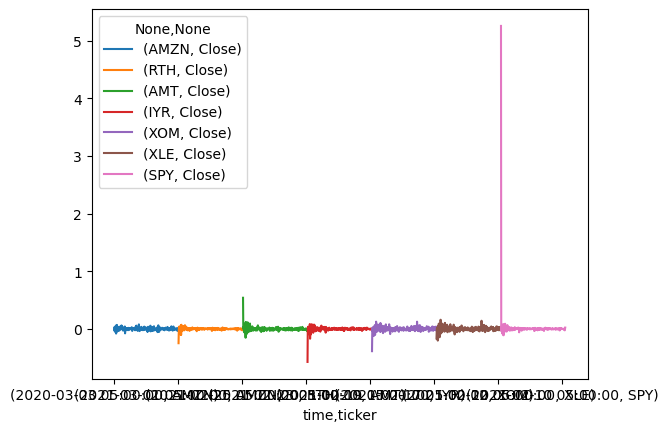

In [79]:
#bar plot comparing returns of all sectors 


In [76]:
#bar plot comparing returns of all portfolio